## Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

1. Use PCA to reduce the dimensionality

    a. How many components did you use? Why?
    
    b. Plot the first two components. Do you notice any trends? What is this plot showing us?
    
    c. Why would you use PCA? What is it doing? And what are the drawbacks?
    
    d. Plot some of the images, then compress them using PCA and plot again. How does it look?
    
2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?
    
    b. How robust is it to changes in perplexity?
    
    c. How robust is it to different learning rate and number of iterations?
    
3. Perform k-means clustering:

    a. How did you choose k?
    
    b. How did you evaluate your clustering?
    
    c. Visualize your clusters using t-sne
    
    d. Did you scale your data?
    
    e. How robust is your clustering?
    
4. Perform hierarchical clustering:

    a. Plot your dendrogram
    
    b. How many clusters seem reasonable based off your graph?
    
    c. How does your dendrogram change with different linkage methods?

# PCA Dimension Reduction

### How many components did you use? Why?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

Looking at the data, there are 70000 different images each that are 28 by 28 dimension flattened into a long 784 array of values. To decrease dimensionality, I am curious how much variance is covered by 100 different variables, so I will run the PCA for 100 different components. I am specifically choosing 100 because we will use only 16% of the original columns, thus our algorithm will could run significantly faster using less variables.

In [3]:
pca = PCA(n_components=100)
X_100dim = pca.fit_transform(X)

Cumulative Variance: 0.9146442719658338


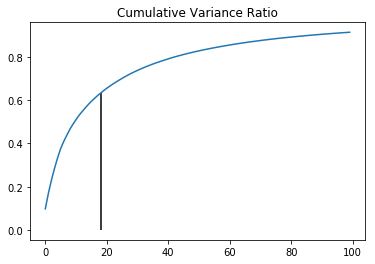

In [4]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.title('Cumulative Variance Ratio')
plt.vlines(ymin=0,ymax=cum_ratio[18],x=18)
print('Cumulative Variance:',cum_ratio[-1])

We see that 91.46% of the variance is covered inside of the first 100 dimensions of the PCA. That's pretty good! This shows we can reduce our dimensionality and still cover a good chunk of the variance in our data. Now let's look at the firs two components graphed against each other.

### Plot the first two components. Do you notice any trends? What is this plot showing us?

Text(0, 0.5, 'Second Principal Component')

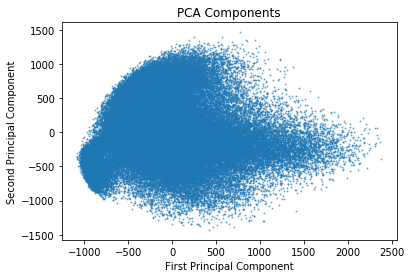

In [5]:
plt.scatter(X_100dim[:,0],X_100dim[:,1],alpha=.5, s=1)
plt.title('PCA Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Upon first glance, we have a lot of data in this file. The first component is skewed more towards the right as its range goes from -1000 to 2500 while the second principal component seems pretty normally distributed. The first component seems to be centered at around 500 whild the second component is closer to 0. Thus the first PC has more variance than the second as expected, however there aren't any major trends in the data. This is the case because the two different components are looking at different columns, thus accounting for different variance. 

### Why would you use PCA? What is it doing? And what are the drawbacks?

We use PCA to reduce the dimensionality of our data. If we have a lot of different dimensions, than our models will run a lot slower and can include random noise that do not actually help our model. In higher dimensions, observations have a higher chance of being farther away from each other, hence the model could potentially overfit with the higher dimensions. 
However, there are some drawbacks. The PCA specifically uses the Euclidean norm, which isn't great for non-numerical data. Thus it may not perform as well for categorical type problems. There is also a problem reducing the dimensionality too far, as it is difficult to understand and may not give the best results.

### Plot some of the images, then compress them using PCA and plot again. How does it look?

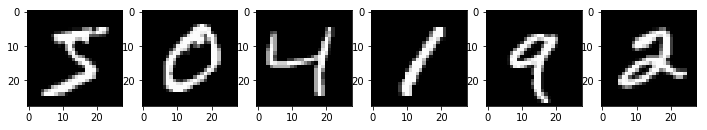

In [6]:
## Plot some of the images
plt.figure(figsize=(12,7))
plt.subplot(161)
plt.imshow(X[0,:].reshape((28,28)),cmap='gray')

plt.subplot(162)
plt.imshow(X[1,:].reshape((28,28)),cmap='gray')

plt.subplot(163)
plt.imshow(X[2,:].reshape((28,28)),cmap='gray')

plt.subplot(164)
plt.imshow(X[3,:].reshape((28,28)),cmap='gray')

plt.subplot(165)
plt.imshow(X[4,:].reshape((28,28)),cmap='gray')

plt.subplot(166)
plt.imshow(X[5,:].reshape((28,28)),cmap='gray')

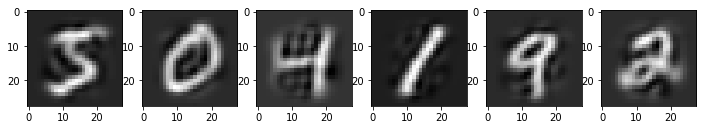

In [7]:
## Reduce the PCA to 50 dimensions.
pca = PCA(n_components=50)
X_50dim = pca.fit_transform(X)

## Transfrom back to its original space.
reverse = pca.inverse_transform(X_50dim)

## Replot each of the previous plots.
plt.figure(figsize=(12,7))
plt.subplot(161)
plt.imshow(reverse[0,:].reshape((28,28)),cmap='gray')

plt.subplot(162)
plt.imshow(reverse[1,:].reshape((28,28)),cmap='gray')

plt.subplot(163)
plt.imshow(reverse[2,:].reshape((28,28)),cmap='gray')

plt.subplot(164)
plt.imshow(reverse[3,:].reshape((28,28)),cmap='gray')

plt.subplot(165)
plt.imshow(reverse[4,:].reshape((28,28)),cmap='gray')

plt.subplot(166)
plt.imshow(reverse[5,:].reshape((28,28)),cmap='gray')

We see that the numbers are actually quite comprehendable, however I do worry that decreasing the dimensionality any further woul make the numbers much more difficult to distinguish.But overall, I think it does a good job grabbing the most important values of the given matrices.

# Use t-SNE to plot the first two components

In [9]:
from sklearn.manifold import TSNE

## First reduce to the first 50 components
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

## Grab the number of rows and reindex them
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 17.009s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 348.461720
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.575851
[t-SNE] KL divergence after 1000 iterations: 1.683173


Text(0.5, 1.0, 'TSNE 2D Plot')

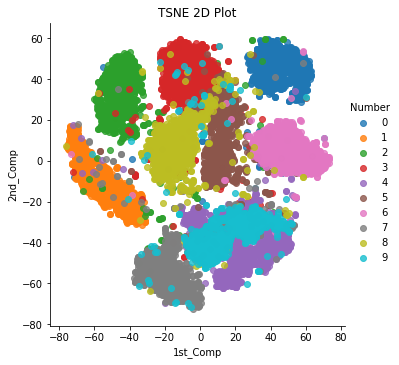

In [10]:
df = pd.DataFrame(tsne_results, columns=['1st_Comp', '2nd_Comp'])
df['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df, hue='Number', fit_reg=False)
plt.title("TSNE 2D Plot")

### How does this plot differ from your PCA plot?

This plot gives us significantly better information regarding the variance in our data. This in interesting because we see which values are easily decipherable and similar. The 4 and 9 numbers are very similar with a many of the values overlapping, along with the 3,5, and 8 but outside of that the 7,1,0,2 and 6 are much easier to decipher. This plot differs from showing the component analysis by the actual number.

### How robust is it to changes in perplexity?

In [12]:
tsne_vals = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
results1 = tsne_vals.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 12.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 229.341338
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.336197
[t-SNE] KL divergence after 1000 iterations: 1.927273


Text(0.5, 1.0, 'TSNE with Perplexity of 5')

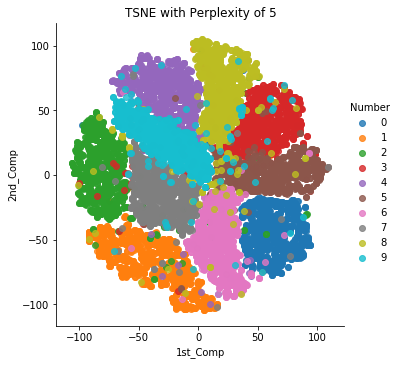

In [14]:
#Perplexity 5 plot
df_tsne = pd.DataFrame(results1, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 5")

In [15]:
tsne_vals = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
results1 = tsne_vals.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 15.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 317.998636
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.250252
[t-SNE] KL divergence after 1000 iterations: 1.808717


Text(0.5, 1.0, 'TSNE with Perplexity of 25')

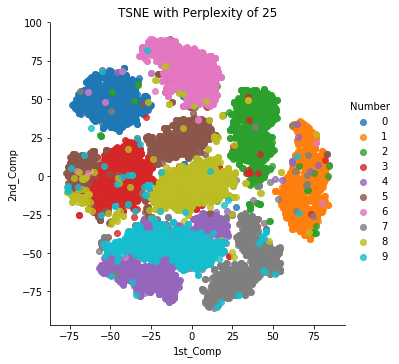

In [16]:
#Perplexity 25 plot
df_tsne = pd.DataFrame(results1, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 25")

The results are interesting. With higher perplexity, the clusters are more dense, and less variance between them. There are more clusters, but overall it doesn't do a great job with the 3s and a couple other variables.

### How robust is it to different learning rate and number of iterations?

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.020s...
[t-SNE] Computed neighbors for 10000 samples in 13.448s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 348.461720
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.615410
[t-SNE] KL divergence after 1000 iterations: 1.781346


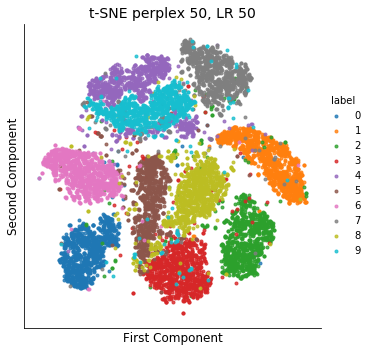

In [17]:
## Here we decrease the learning rate to 50.
tsne45 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results45 = tsne45.fit_transform(X_pca[rows[:n_select],:])

## Put the T-SNE into a dataframe and change labels.
df_tsne45 = pd.DataFrame(tsne_results45, columns=['comp1', 'comp2'])
df_tsne45['label'] = y[rows[:n_select]]

## Plot the results.
sns.lmplot(x='comp1', y='comp2', data=df_tsne45, hue='label', fit_reg=False, markers='.')
plt.title("t-SNE perplex 50, LR 50", fontsize=14)
plt.ylabel("Second Component", fontsize = 12)
plt.xlabel("First Component", fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 15.245s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 348.461720
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.694588
[t-SNE] KL divergence after 1000 iterations: 1.673466


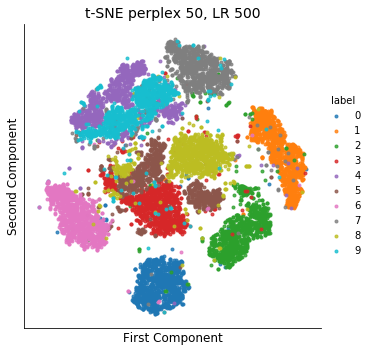

In [18]:
## Here we increase the learning rate to 200.
tsne45 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=500)
tsne_results45 = tsne45.fit_transform(X_pca[rows[:n_select],:])

## Put the T-SNE into a dataframe and change labels.
df_tsne45 = pd.DataFrame(tsne_results45, columns=['comp1', 'comp2'])
df_tsne45['label'] = y[rows[:n_select]]

## Plot the results.
sns.lmplot(x='comp1', y='comp2', data=df_tsne45, hue='label', fit_reg=False, markers='.')
plt.title("t-SNE perplex 50, LR 500", fontsize=14)
plt.ylabel("Second Component", fontsize = 12)
plt.xlabel("First Component", fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
## Here we change the number of iterations to 100
tsne45 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, learning_rate=500)
tsne_results45 = tsne45.fit_transform(X_pca[rows[:n_select],:])

## Put the T-SNE into a dataframe and change labels.
df_tsne45 = pd.DataFrame(tsne_results45, columns=['comp1', 'comp2'])
df_tsne45['label'] = y[rows[:n_select]]

## Plot the results.
sns.lmplot(x='comp1', y='comp2', data=df_tsne45, hue='label', fit_reg=False, markers='.')
plt.title("t-SNE perplex 50, N_It 300", fontsize=14)
plt.ylabel("Second Component", fontsize = 12)
plt.xlabel("First Component", fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.show()

These results are interesting. We see that the model changes, as do the size of the clusters. But overall, these changes aren't drastic, and in each case the 4 and the 9 continue to be blended together because their images are very similar. Overall, I think changes in these parameters do not have major effects on the t-SNE.

# Perform k-means clustering:

I evaluated the clustering for several different values, and wanted to look at the convergence graph. The model is taking quite some time (as I am running it at the same time as my PCA), however 

In [35]:
from sklearn.cluster import KMeans

sses = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X[:10000,:],y[:10000])
    sses.append(kmeans.inertia_)

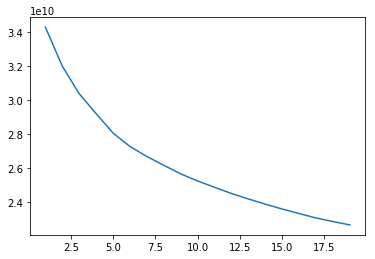

In [34]:
plt.plot(range(1,20), sses)
plt.show()

### How did you choose k?

I choose k based on the elbow of the graph. I did not include more because it is taking lots of time on my computer, however the elbow in the graph seems to sit on about k=6. Thus we will predict on k=6 for this specific problem.

### How did you evaluate your clustering?

In [36]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X[:10000,:],y[:10000])
k_clusters = kmeans.predict(X[10000:20000])

I will evaluate the cluster using two different methods, both of which are on scikit learn. We didn't go over these in class, but consulting other labs and people, these seem to give good results for our project. I specifically am running the model over 10000 values because it is taking quite some time to run on my computer along with the PCA model I'm also running.

In [38]:
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

## Calculate Adjusted Rand Score
print("Adjusted Rand Score: {}"
      .format(adjusted_rand_score(y[10000:20000], k_clusters)))

Adjusted Rand Score: 0.34717328254141444


In [39]:
## Calculate Completeness Score
print("Completeness Score: {}"
      .format(completeness_score(y[10000:20000], k_clusters)))

Completeness Score: 0.4794750524804756


Adjusted Rand Score finds the similarity of measure between the two clusters, giving it between a -1 and 1, with 1 being the perfect score. Thus overall, this score shows our model does not run well for this case.

Completeness Score tests how complete each class is in its cluster, thus it means about half of these points are inside of the cluster. It seems to work ok, but not fantastic overall. We need something more powerful or probably a stronger model to increase our accuracy.

### Visualize your clusters using t-sne

Text(0.5, 1.0, 'Truth')

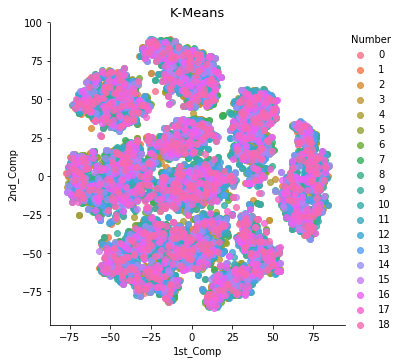

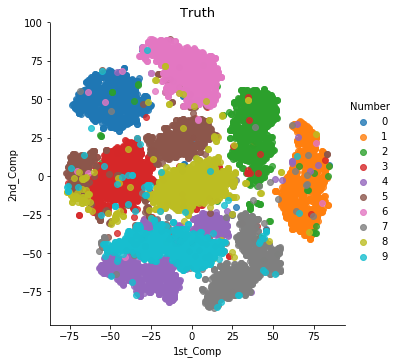

In [57]:
df_kmeans = pd.DataFrame(results1[:10000], columns=['1st_Comp', '2nd_Comp'])
df_kmeans['Number'] = k_clusters

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("K-Means",fontsize=13)

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("Truth",fontsize=13)

### Did you scale your data?

I did not scale the data for this instance because the data is all similar, as I didn't see a need to scale this data set. Any type of scaling would actually make it more difficult for the model to see the differences in each cluster and value.

### How robust is your clustering?

Overall, I don't think the clustering is very robust because of the lack of changes earlier in the data. Thus any other major changes shouldn't change the clustering very much. The data is quite similar for each of the 10 numbers, thus the clusters overall shouldn't change very much either.

# Perform hierarchical clustering:

### Plot your dendrogram

In [50]:
#allow for a random sample of 100 observations from the MNIST data
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 100

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

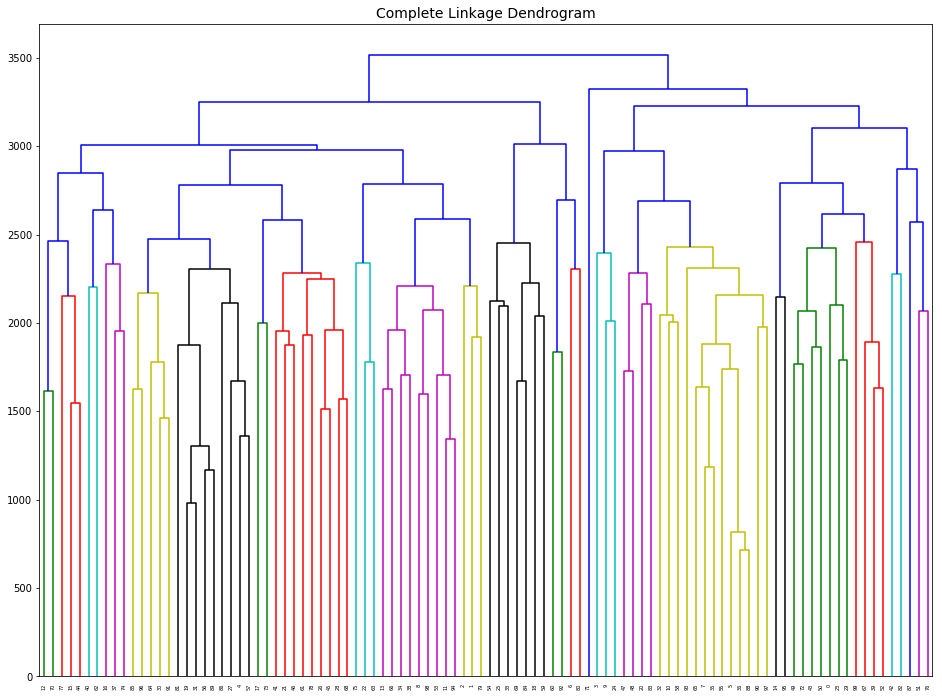

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

## Plot the dendogram 100 random values from the data set.
Z = linkage(X[rows[:n_select],:], 'complete')
plt.figure(figsize=(16, 12))
dendro_complete = dendrogram(Z)
plt.title("Complete Linkage Dendrogram", fontsize=14)

### How many clusters seem reasonable based off your graph?

Because I know this data set well and with my experience with it, we know there are 10 different digits that exist in the data set. We see many of these clusters above converge into smaller values, hence anywhere between 9-11 clusters would be good.

### How does your dendrogram change with different linkage methods?

Text(0.5, 1.0, 'Ward Linkage Dendrogram')

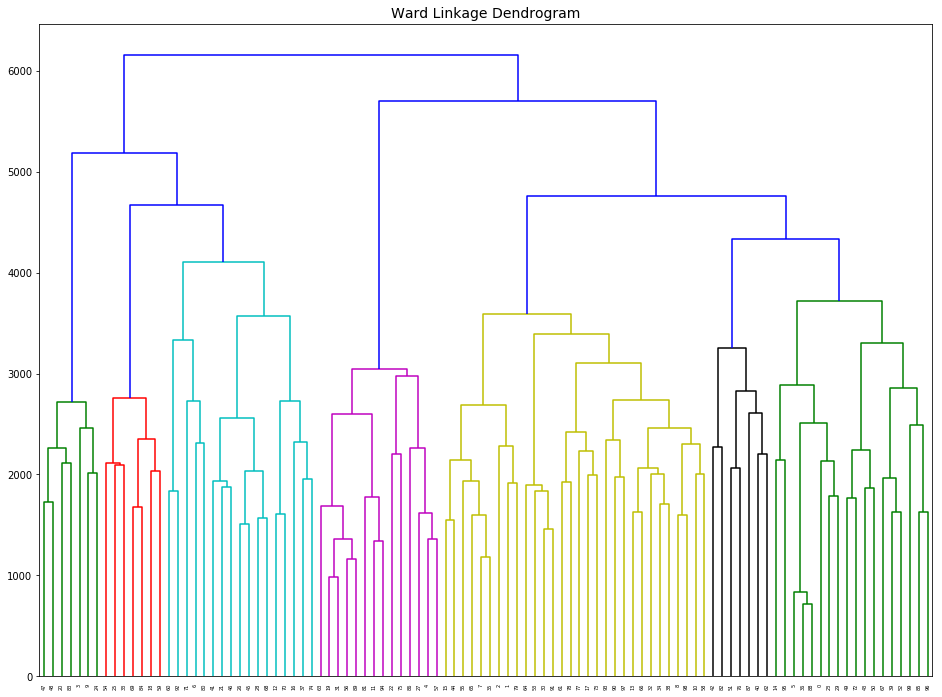

In [52]:
## Dendrogram using the ward linkage method.
W = linkage(X[rows[:n_select_100],:], 'ward')
plt.figure(figsize=(16, 12))
dendro_ward = dendrogram(W)
plt.title("Ward Linkage Dendrogram", fontsize=14)

The dendrogram changes a bit with the ward linkage method, as it takes much longer for it to converge into smaller smaller clusters. Thus overall, I think that the complete method shows better results for this problem.

Text(0.5, 1.0, 'Single Linkage Dendrogram')

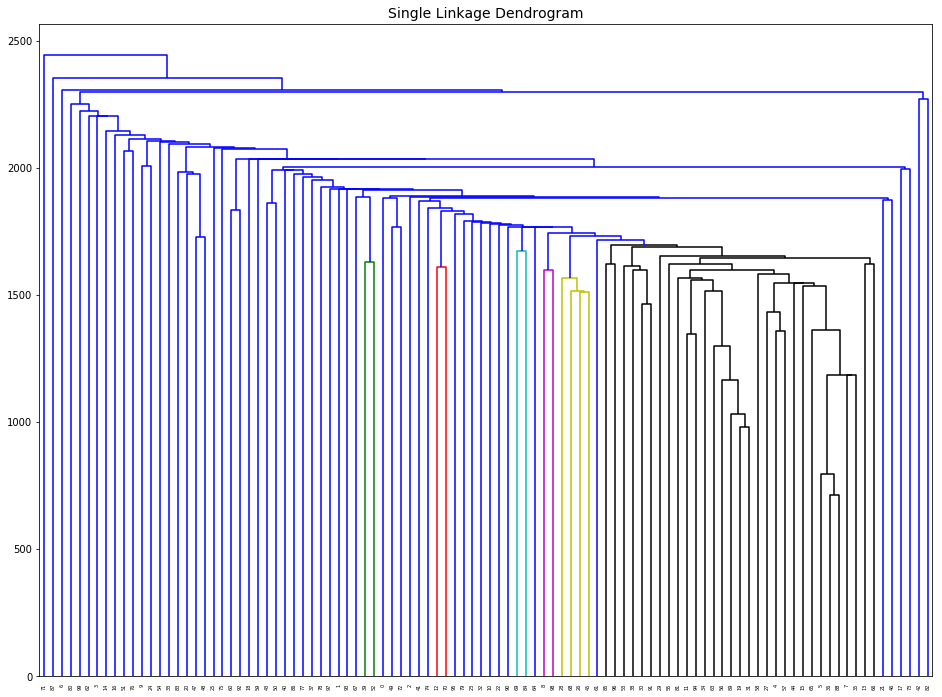

In [53]:
## Finally we use the single linkage method.
Y = linkage(X[rows[:n_select_100],:], 'single')
plt.figure(figsize=(16, 12))
dendro_single = dendrogram(Y)
plt.title("Single Linkage Dendrogram", fontsize=14)

This shows many different clusters, but they all converge into the blue method. Overall I think the complete method still gives us the most readable dendrogram, and is the most useful in our case. Now, if I did not understand the data well, then this possibly could give us better insight into the clusters converging into a single clusters. 

### Grading

This homework is due **March 28, 2019 by 4:00 pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* PCA - 20%
* T-SNE - 20%
* K-means - 20%
* Hierarchical Clustering - 20%